In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import paired_cosine_distances

from Cluster import Cluster
from IncDBSCAN import IncrementalDBSCAN
from DatasetPattern import DatasetPattern
from utils import initDataset

from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [2]:
centers = [[1, 1], [-1, -1], [1, -1], [-1, 1]]
X, labels_true = make_blobs(
    n_samples=1000, centers=centers, cluster_std=0.3, random_state=24
)

X = StandardScaler().fit_transform(X)

In [3]:
start_time = time.time()
db = DBSCAN(eps=0.3, min_samples=10, metric="euclidean").fit(X)
#core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
elapsed_time = time.time() - start_time
print("elapsed_time: {}[sec]".format(elapsed_time))

elapsed_time: 0.005026102066040039[sec]


In [4]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
#print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 4
Estimated number of noise points: 7
Homogeneity: 0.985
Completeness: 0.963
V-measure: 0.974
Adjusted Rand Index: 0.985
Adjusted Mutual Information: 0.973


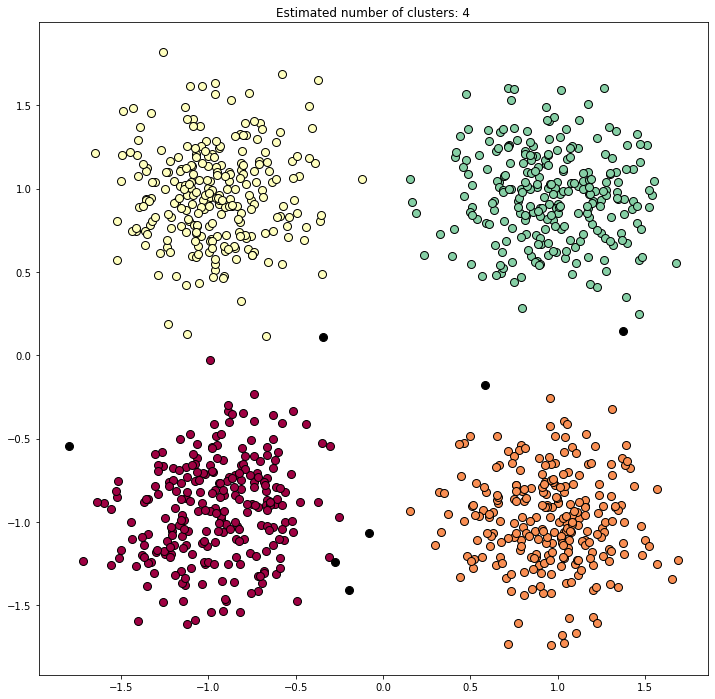

In [5]:
fig = plt.figure(figsize=(12.0, 12.0))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=8,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [6]:
#np.random.shuffle(X)
Xinc = initDataset(X)
start_time = time.time()
incDBSCAN = IncrementalDBSCAN(minpts=10,eps=0.3,metric="euclidean")
for p in Xinc:
    clu = incDBSCAN.fit(p)
elapsed_time = time.time() - start_time
clustersList = incDBSCAN.getClustersList()
print("Incremental DBSCAN Results")
print("==========================")
print("")
incDBSCAN.printClustersInformation()
print("")
print("Runtime = {}[sec]".format(elapsed_time))
print("EPS = {}".format(0.3))
print("Minpts = {}".format(10))

Incremental DBSCAN Results

Dataset has 1000 Points
Cluster 1 has 246 Points
Cluster 2 has 249 Points
Cluster 3 has 249 Points
Cluster 4 has 249 Points

Runtime = 3.9246163368225098[sec]
EPS = 0.3
Minpts = 10


In [7]:
inc_labels = np.array(incDBSCAN.getLabels())
inc_n_clusters_ = len(set(inc_labels)) - (1 if -1 in inc_labels else 0)
inc_n_noise_ = list(inc_labels).count(-1)

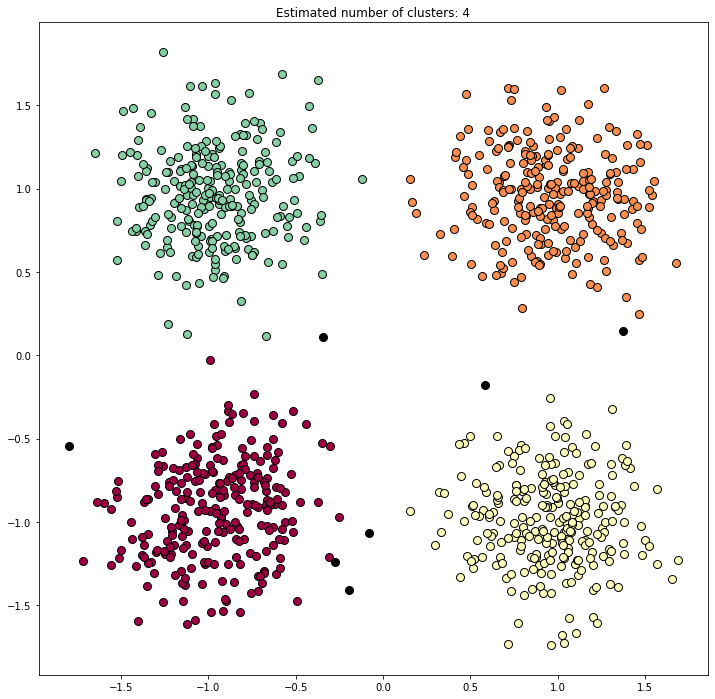

In [8]:
fig = plt.figure(figsize=(12.0, 12.0))
inc_unique_labels = set(inc_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(inc_unique_labels))]
for k, col in zip(inc_unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    inc_class_member_mask = inc_labels == k

    inc_xy = X[inc_class_member_mask]
    plt.plot(
        inc_xy[:, 0],
        inc_xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=8,
    )

plt.title("Estimated number of clusters: %d" % inc_n_clusters_)
plt.show()

In [9]:
inc_unique_labels

{-1, 0, 1, 2, 3}